In [ ]:
# Importing the Data

import pandas as pd
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/NBA_Project.xlsx'
df = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
# Viewing the data

pd.set_option("display.max_columns", None)
df.head()

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,GSW,GSW vs. PHX,2023-10-24 00:00:00,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4
1,PHX,PHX @ GSW,10/24/2023,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4
2,LAL,LAL @ DEN,10/24/2023,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12
3,DEN,DEN vs. LAL,10/24/2023,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12
4,MEM,MEM vs. NOP,10/25/2023,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7


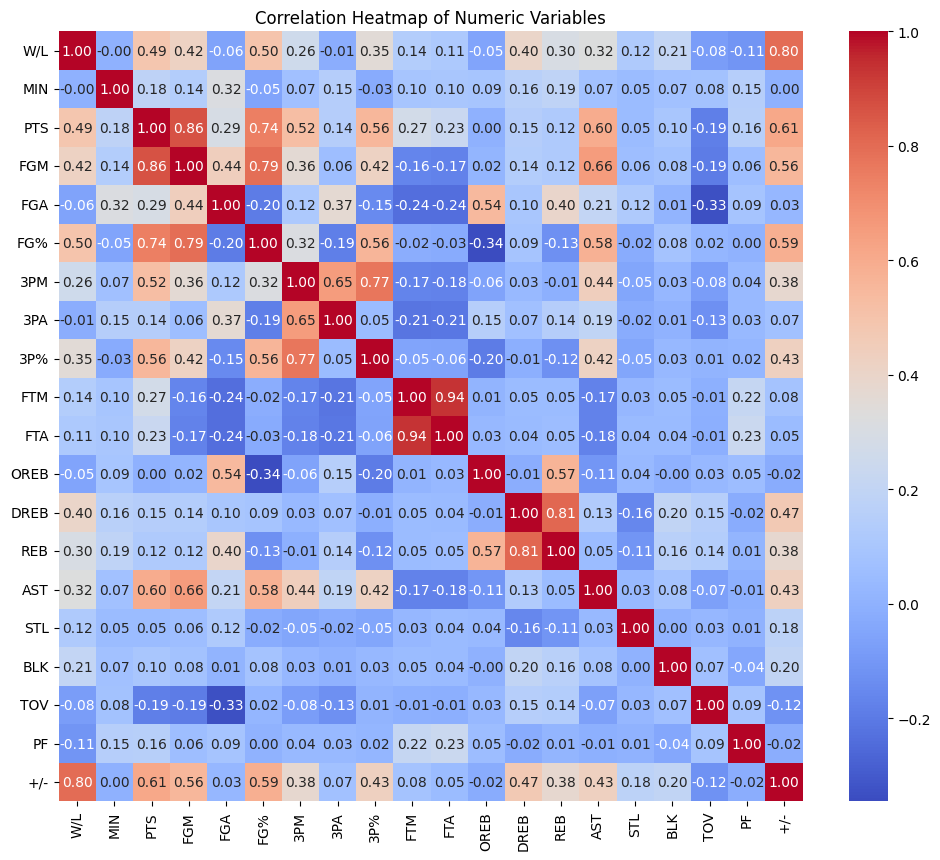

In [ ]:
# prompt: Create a correlation heat map of all numeric variables

import seaborn as sns
import matplotlib.pyplot as plt

# Turn W/L Column into binary:
copydf = df.copy()
copydf['W/L'] = copydf['W/L'].map({'W': 1, 'L': 0})

# Assuming 'df' is your DataFrame and it's already loaded
# Calculate the correlation matrix, selecting only numeric columns
numeric_df = copydf.select_dtypes(include=['number']) # Select only numeric columns
corr_matrix = numeric_df.drop(columns=['Game ID'], errors='ignore').corr() # Drop non-numeric & irrelevant columns, ignore errors if they're already dropped

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Feature Engineering

### Assign Game ID

In [ ]:
# Assign a Game ID to group by when we do train-test split:

# Create a new column 'Game ID'
df['Game ID'] = (df.index // 2) + 1

# Get a list of all column names
cols = df.columns.tolist()

# Move 'Game ID' to the beginning
cols.insert(0, cols.pop(cols.index('Game ID')))

# Reorder the DataFrame columns
df = df[cols]

# Display the updated DataFrame
df.head()

,Game ID,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,1,GSW,GSW vs. PHX,2023-10-24 00:00:00,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4
1,1,PHX,PHX @ GSW,10/24/2023,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4
2,2,LAL,LAL @ DEN,10/24/2023,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12
3,2,DEN,DEN vs. LAL,10/24/2023,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12
4,3,MEM,MEM vs. NOP,10/25/2023,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7


### Feature 1: Home Advantage

In [ ]:
# Adding Home Advantage:

df['Home Advantage'] = df['Match Up'].apply(lambda x: 0 if '@' in x else 1)

# Get a list of columns
cols = list(df.columns)

# Find the index of 'Match Up' and 'Home Advantage' columns
matchup_index = cols.index('Match Up')
home_adv_index = cols.index('Home Advantage')

# Move 'Home Advantage' to the right of 'Match Up'
cols.insert(matchup_index + 1, cols.pop(home_adv_index))

# Reorder the DataFrame columns
df = df[cols]

df.head()

<ipython-input-5-805d522f1eb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home Advantage'] = df['Match Up'].apply(lambda x: 0 if '@' in x else 1)


,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,1,GSW,GSW vs. PHX,1,2023-10-24 00:00:00,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4
1,1,PHX,PHX @ GSW,0,10/24/2023,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4
2,2,LAL,LAL @ DEN,0,10/24/2023,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12
3,2,DEN,DEN vs. LAL,1,10/24/2023,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12
4,3,MEM,MEM vs. NOP,1,10/25/2023,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7


### Feature 2: Days Since Last Game

In [ ]:
# Adds days since last game column:

# Convert 'Game Date' to datetime objects if it's not already
df['Game Date'] = pd.to_datetime(df['Game Date'])

# Sort the DataFrame by 'Team' and 'Game Date'
df = df.sort_values(by=['Team', 'Game Date'])

# Calculate days since last game for each team
df['Days Since Last Game'] = df.groupby('Team')['Game Date'].diff().dt.days.fillna(0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game
22,12,ATL,ATL @ CHA,0,2023-10-25,L,240,110,39,93,41.9,5,29,17.2,27,33,81.8,12,30,42,24,12,1,12,19,-6,0.0
39,20,ATL,ATL vs. NYK,1,2023-10-27,L,240,120,42,87,48.3,12,32,37.5,24,30,80,9,35,44,28,7,6,14,20,-6,2.0
76,39,ATL,ATL @ MIL,0,2023-10-29,W,240,127,47,93,50.5,15,37,40.5,18,22,81.8,13,33,46,32,15,2,17,17,17,2.0
89,45,ATL,ATL vs. MIN,1,2023-10-30,W,240,127,48,86,55.8,14,30,46.7,17,18,94.4,4,32,36,28,6,7,11,12,14,1.0
123,62,ATL,ATL vs. WAS,1,2023-11-01,W,240,130,46,92,50.0,9,32,28.1,29,32,90.6,14,43,57,26,8,3,21,16,9,2.0


### Feature 3: Instability (SD of points)


In [ ]:
# Standard deviation of each team's points
df['SD of Points'] = df.groupby('Team')['PTS'].transform(lambda x: x.std())
df = df.sort_index()
df.head()

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points
0,1,GSW,GSW vs. PHX,1,2023-10-24,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405
1,1,PHX,PHX @ GSW,0,2023-10-24,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491
2,2,LAL,LAL @ DEN,0,2023-10-24,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910
3,2,DEN,DEN vs. LAL,1,2023-10-24,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955
4,3,MEM,MEM vs. NOP,1,2023-10-25,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177


### Feature 4: Past record of win and losses of each team facing each other

In [ ]:
# Number of wins of each team facing each other
df['Past Wins'] = df.groupby('Match Up')['W/L'].transform(lambda x: x.eq('W').cumsum())
df = df.sort_index()
df.head()

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins
0,1,GSW,GSW vs. PHX,1,2023-10-24,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0
1,1,PHX,PHX @ GSW,0,2023-10-24,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1
2,2,LAL,LAL @ DEN,0,2023-10-24,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0
3,2,DEN,DEN vs. LAL,1,2023-10-24,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1
4,3,MEM,MEM vs. NOP,1,2023-10-25,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0


### Feature 5: Assign higher weight to more recent games

In [ ]:
# Assign higher weights to more recent games
df['Game Weight'] = df.groupby('Team')['Game ID'].transform(lambda x: np.arange(1, len(x) + 1))
df = df.sort_index()
df.head()

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight
0,1,GSW,GSW vs. PHX,1,2023-10-24,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0,1
1,1,PHX,PHX @ GSW,0,2023-10-24,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1,1
2,2,LAL,LAL @ DEN,0,2023-10-24,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0,1
3,2,DEN,DEN vs. LAL,1,2023-10-24,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1,1
4,3,MEM,MEM vs. NOP,1,2023-10-25,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0,1


#### Feature 6: Season Segment

In [ ]:
# Assigns each game a season segment:

# Calculate the total number of games
total_games = len(df) // 2  # Divide by 2 as each game has 2 observations

# Calculate the thresholds for each season segment
early_threshold = total_games // 3
mid_threshold = 2 * early_threshold

# Create a new column 'Season Segment'
df['Season Segment'] = pd.cut(df.index // 2,
                               bins=[0, early_threshold, mid_threshold, total_games],
                               labels=['Early', 'Mid', 'Late'],
                               include_lowest=True)

df.head()

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight,Season Segment
0,1,GSW,GSW vs. PHX,1,2023-10-24,L,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0,1,Early
1,1,PHX,PHX @ GSW,0,2023-10-24,W,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1,1,Early
2,2,LAL,LAL @ DEN,0,2023-10-24,L,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0,1,Early
3,2,DEN,DEN vs. LAL,1,2023-10-24,W,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1,1,Early
4,3,MEM,MEM vs. NOP,1,2023-10-25,L,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0,1,Early


#### Feature 7: Winstreak

We will define the winstreak value as the number of games the team has won in a row leading up to the current game.

Since both teams can have a winstreak, we will have winstreak_home, and winstreak_away to represent the home team and away team's winstreaks, respectively

In [ ]:
## Calculate the winstreak for the home and away teams

# initialize new columns + base case first game set winstreak to 0
df['Winstreak Home'] = 0
df['Winstreak Away'] = 0

# converting team to type category
df['Team'] = df['Team'].astype('category')

# get the list of all the teams
teams = df['Team'].cat.categories

# group by the teams to calculate winstreak
for team in teams:
  list_games = df[df['Team'] == team]
  winstreak = 0
  for game in list_games.itertuples():
    # assign winstreak to the data, for home or away
    if game[4] == 1:
      df.loc[game[0], 'Winstreak Home'] = winstreak
    else:
      df.loc[game[0], 'Winstreak Away'] = winstreak
    if game[6] == 'W':
      winstreak += 1
    else:
      winstreak = 0

df.sort_values(['Team', 'Game Date']).head(25)

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight,Season Segment,Winstreak Home,Winstreak Away
22,12,ATL,ATL @ CHA,0,2023-10-25,L,240,110,39,93,41.9,5,29,17.2,27,33,81.8,12,30,42,24,12,1,12,19,-6,0.0,12.669644,0,1,Early,0,0
39,20,ATL,ATL vs. NYK,1,2023-10-27,L,240,120,42,87,48.3,12,32,37.5,24,30,80,9,35,44,28,7,6,14,20,-6,2.0,12.669644,0,2,Early,0,0
76,39,ATL,ATL @ MIL,0,2023-10-29,W,240,127,47,93,50.5,15,37,40.5,18,22,81.8,13,33,46,32,15,2,17,17,17,2.0,12.669644,1,3,Early,0,0
89,45,ATL,ATL vs. MIN,1,2023-10-30,W,240,127,48,86,55.8,14,30,46.7,17,18,94.4,4,32,36,28,6,7,11,12,14,1.0,12.669644,1,4,Early,1,0
123,62,ATL,ATL vs. WAS,1,2023-11-01,W,240,130,46,92,50.0,9,32,28.1,29,32,90.6,14,43,57,26,8,3,21,16,9,2.0,12.669644,1,5,Early,2,0
164,83,ATL,ATL @ NOP,0,2023-11-04,W,240,123,45,93,48.4,14,41,34.1,19,24,79.2,19,33,52,28,4,6,13,16,18,3.0,12.669644,1,6,Early,0,3
182,92,ATL,ATL @ OKC,0,2023-11-06,L,240,117,38,102,37.3,14,42,33.3,27,32,84.4,25,34,59,27,8,3,15,16,-9,2.0,12.669644,0,7,Early,0,4
236,119,ATL,ATL @ ORL,0,2023-11-09,W,240,120,41,85,48.2,15,39,38.5,23,30,76.7,8,28,36,22,13,7,18,25,1,3.0,12.669644,1,8,Early,0,0
260,131,ATL,ATL vs. MIA,1,2023-11-11,L,240,109,38,87,43.7,18,46,39.1,15,18,83.3,15,33,48,23,6,6,22,19,-8,2.0,12.669644,0,9,Early,1,0
306,154,ATL,ATL @ DET,0,2023-11-14,W,240,126,45,87,51.7,12,33,36.4,24,26,92.3,10,31,41,28,9,7,14,19,6,3.0,12.669644,1,10,Early,0,0


### Number of games total

In [ ]:
# Number of games total:
num_games = len(df) // 2
print(f"Number of games in the season: {num_games}")

# Number of teams total:
num_teams = df['Team'].nunique()
print(f"Number of unique teams: {num_teams}")

# Number of games per team:
games_per_team = df['Team'].value_counts()
print(f"Number of games per team: {games_per_team}")

Number of games in the season: 1230
Number of unique teams: 30
Number of games per team: Team
ATL    82
BKN    82
UTA    82
TOR    82
SAS    82
SAC    82
POR    82
PHX    82
PHI    82
ORL    82
OKC    82
NYK    82
NOP    82
MIN    82
MIL    82
MIA    82
MEM    82
LAL    82
LAC    82
IND    82
HOU    82
GSW    82
DET    82
DEN    82
DAL    82
CLE    82
CHI    82
CHA    82
BOS    82
WAS    82
Name: count, dtype: int64


In [ ]:
# Turn W/L Column into binary:

df['W/L'] = df['W/L'].map({'W': 1, 'L': 0})

df.head()

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight,Season Segment,Winstreak Home,Winstreak Away
0,1,GSW,GSW vs. PHX,1,2023-10-24,0,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0,1,Early,0,0
1,1,PHX,PHX @ GSW,0,2023-10-24,1,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1,1,Early,0,0
2,2,LAL,LAL @ DEN,0,2023-10-24,0,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0,1,Early,0,0
3,2,DEN,DEN vs. LAL,1,2023-10-24,1,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1,1,Early,0,0
4,3,MEM,MEM vs. NOP,1,2023-10-25,0,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0,1,Early,0,0


Handling missing values:

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    # Convert column to numeric (coerce invalid to NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Replace missing values (NaN) with column mean
    df[col].fillna(df[col].mean(), inplace=True)

df.head()

<ipython-input-14-f5c8d95bf742>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight,Season Segment,Winstreak Home,Winstreak Away
0,1,GSW,GSW vs. PHX,1,2023-10-24,0,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0,1,Early,0,0
1,1,PHX,PHX @ GSW,0,2023-10-24,1,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1,1,Early,0,0
2,2,LAL,LAL @ DEN,0,2023-10-24,0,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0,1,Early,0,0
3,2,DEN,DEN vs. LAL,1,2023-10-24,1,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1,1,Early,0,0
4,3,MEM,MEM vs. NOP,1,2023-10-25,0,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0,1,Early,0,0


# One-Hot Encoding

Use encoded_df if the model requires one-hot encoding.

In [ ]:
encoded_df = df.copy()

# One-hot encoding for 'Season Segment' in the new DataFrame
season_segment_dummies = pd.get_dummies(encoded_df['Season Segment'], prefix='Season_')
encoded_df = pd.concat([encoded_df, season_segment_dummies], axis=1)
encoded_df = encoded_df.drop('Season Segment', axis=1)

encoded_df.head(150)

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight,Winstreak Home,Winstreak Away,Season__Early,Season__Mid,Season__Late
0,1,GSW,GSW vs. PHX,1,2023-10-24,0,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0,1,0,0,True,False,False
1,1,PHX,PHX @ GSW,0,2023-10-24,1,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1,1,0,0,True,False,False
2,2,LAL,LAL @ DEN,0,2023-10-24,0,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0,1,0,0,True,False,False
3,2,DEN,DEN vs. LAL,1,2023-10-24,1,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1,1,0,0,True,False,False
4,3,MEM,MEM vs. NOP,1,2023-10-25,0,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0,1,0,0,True,False,False
5,3,IND,IND vs. WAS,1,2023-10-25,1,240,143,56,107,52.3,20,43,46.5,11,12,91.7,10,41,51,38,10,8,12,23,23,0.0,13.602367,1,1,0,0,True,False,False
6,4,WAS,WAS @ IND,0,2023-10-25,0,240,120,44,96,45.8,9,24,37.5,23,29,79.3,11,34,45,28,6,9,14,11,-23,0.0,10.532502,0,1,0,0,True,False,False
7,4,CHA,CHA vs. ATL,1,2023-10-25,1,240,116,43,86,50.0,11,37,29.7,19,26,73.1,12,39,51,34,5,3,19,21,6,0.0,12.123797,1,1,0,0,True,False,False
8,5,NYK,NYK vs. BOS,1,2023-10-25,0,240,104,36,97,37.1,18,41,43.9,14,26,53.8,17,30,47,24,9,0,11,22,-4,0.0,12.219937,0,1,0,0,True,False,False
9,5,MIA,MIA vs. DET,1,2023-10-25,1,240,103,37,92,40.2,8,22,36.4,21,26,80.8,16,32,48,22,11,3,7,18,1,0.0,11.476355,1,1,0,0,True,False,False


# Splitting the Data

Important to drop +/-, because it is a data leakage.  The feature value was positive for a team that won, and negative for the team that lost, which led to a 100% accuracy rate in our model. May be also with PTS.

There was an issue with the Win Streak feature I made, resulting in data leakage. We can try again as I think it is potentially useful, but the one I made was including the current win in the calulation resulting in 100% accuracy.

Also removed REB because it is the sum of DREB and OREB.

Also removed FGM because it is essentially the same thing as PTS (just without free throws) and had high correlation that led to overfitting.

In [ ]:
# prompt: Split the data in a 80-20 train test split

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = encoded_df.drop(columns=['Game ID', 'Team', 'Match Up', 'Game Date', 'W/L', '+/-', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'Past Wins'])
y = encoded_df['W/L']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Use random_state for reproducibility

In [ ]:
# Split the data, but keep each game (two observations) grouped together.

from sklearn.model_selection import GroupShuffleSplit

# Use this code that is commented out if the model does not use one-hot encoding
# X = df.drop(columns=['Game ID', 'Team', 'Match Up', 'Game Date', 'W/L', '+/-', 'PTS', 'FG%', '3P%', 'FT%', 'REB'])
# y = df['W/L']

# Use this code if the model uses one-hot encoding
X = encoded_df.drop(columns=['Game ID', 'Team', 'Match Up', 'Game Date', 'W/L', '+/-', 'PTS', 'FG%', '3P%', 'FT%', 'FGM', 'REB', 'Past Wins'])
y = encoded_df['W/L']

game_ids = df['Game ID']

gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=game_ids))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 1968, Test size: 492


In [ ]:
# Take a peek at our datasets
X.head()


,Home Advantage,MIN,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,PF,Days Since Last Game,SD of Points,Game Weight,Winstreak Home,Winstreak Away,Season__Early,Season__Mid,Season__Late
0,1,240,101,10,43,22,28,18,31,19,11,6,11,23,0.0,11.722405,1,0,0,True,False,False
1,0,240,95,11,33,13,17,17,43,23,5,7,19,22,0.0,10.575491,1,0,0,True,False,False
2,0,240,90,10,29,15,20,13,31,23,5,4,12,18,0.0,12.441910,1,0,0,True,False,False
3,1,240,91,14,34,9,12,9,33,29,9,6,12,15,0.0,12.357955,1,0,0,True,False,False
4,1,240,91,12,43,16,20,8,29,23,8,7,13,19,0.0,9.867177,1,0,0,True,False,False


In [ ]:
print(y.head())

0    0
1    1
2    0
3    1
4    0
Name: W/L, dtype: int64


# Feature Selection

In [ ]:
# Check if the same Game ID appears in both train and test sets
# train_game_ids = set(game_ids.iloc[train_idx])
# test_game_ids = set(game_ids.iloc[test_idx])

# overlap = train_game_ids & test_game_ids
# print(f"Number of overlapping Game IDs: {len(overlap)}")

# Combine X_train and y_train to calculate correlations
train_data = X_train.copy()
train_data['W/L'] = y_train

# Remove non-numeric columns
train_data = train_data.select_dtypes(include=['number'])

# Compute correlation matrix
correlations = train_data.corr()

# Sort by correlation with the target
print(correlations['W/L'].sort_values(ascending=False))


W/L                     1.000000
DREB                    0.402742
AST                     0.306751
3PM                     0.248858
BLK                     0.210057
FTM                     0.147963
STL                     0.143052
FTA                     0.112513
Home Advantage          0.082322
Winstreak Home          0.081656
SD of Points            0.039996
Winstreak Away          0.015367
Days Since Last Game    0.010927
Game Weight            -0.001395
MIN                    -0.010640
3PA                    -0.026167
FGA                    -0.048723
OREB                   -0.048853
TOV                    -0.077767
PF                     -0.102529
Name: W/L, dtype: float64


# Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.7764227642276422


#### Random Forest Model Performance based on K Fold-CV


We try K = 6 then K = 10, note that there is a bias-variance tradeoff with higher values of K

---



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# K = 6
kf = KFold(n_splits=6)
iterator = 1
for train_set, test_set in kf.split(X, y):
  print(f'Fold:{iterator}, Train set: {len(train_set)}, Test set:{len(test_set)}')
  score = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')
  iterator += 1
print(score)

# # K = 10
# kf = KFold(n_splits=10)
# iterator = 1
# for train_set, test_set in kf.split(X, y):
#   print(f'Fold:{iterator}, Train set: {len(train_set)}, Test set:{len(test_set)}')
#   score = cross_val_score(rf_classifier, X, y, cv= kf)
#   # # Split into X training and Y Training Data
#   # X_train = train[:-1]
#   # y_train = train[1]
#   # # Split into Y test and Y Prediction Data
#   # X_test = test.drop(columns=['W/L'])
#   # y_test = test['W/L']
#   # # Train the model
#   # rf_classifier.fit(X_train, y_train)

#   # # Make predictions on the test set
#   # y_pred = rf_classifier.predict(X_test)

#   # # Evaluate the model (example: accuracy)
#   # accuracy = accuracy_score(y_test, y_pred)
#   #print(f"Step: {iterator}, Accuracy of the Random Forest model: {score}")
#   iterator += 1
# print(score)

Fold:1, Train set: 2050, Test set:410
Fold:2, Train set: 2050, Test set:410
Fold:3, Train set: 2050, Test set:410
Fold:4, Train set: 2050, Test set:410
Fold:5, Train set: 2050, Test set:410
Fold:6, Train set: 2050, Test set:410
[0.72682927 0.77073171 0.80243902 0.77317073 0.76829268 0.80487805]


Our top accuracy fold has over 80% accuracy, meaning that we are probably using future data to predict past data because the folds are randomized chronologically

#### Random Forest Model Performance based on time-series K Fold-CV

We will make folds taking into account the date of the game. We will only make folds by taking previous data to predict later games.



In [ ]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 6
tscv = TimeSeriesSplit(n_splits)
iterator = 1
for train_set, test_set in tscv.split(X, y):
  print(f'Fold:{iterator}, Train set: {len(train_set)}, Test set:{len(test_set)}')
  score = cross_val_score(rf_classifier, X, y, cv=tscv, scoring='accuracy')
  iterator += 1
print(score)

Fold:1, Train set: 354, Test set:351
Fold:2, Train set: 705, Test set:351
Fold:3, Train set: 1056, Test set:351
Fold:4, Train set: 1407, Test set:351
Fold:5, Train set: 1758, Test set:351
Fold:6, Train set: 2109, Test set:351
[0.74358974 0.77492877 0.76638177 0.77777778 0.76068376 0.79487179]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model (example: accuracy)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of the Logistic Regression model: {accuracy_logreg}")

Accuracy of the Logistic Regression model: 0.7947154471544715


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ensemble Method:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# K-Nearest Neighbors with Scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Support Vector Machine with Scaling
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()

# Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Create the ensemble using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('logreg', logreg_model),
        ('knn', knn_pipeline),
        ('svc', svc_pipeline),
        ('lda', lda_model),
        ('qda', qda_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # Use soft voting for better performance
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy of the Ensemble model: {accuracy_ensemble}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of the Ensemble model: 0.8109756097560976


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Models
rf_classifier = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
svc_pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True, random_state=42))])
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# List of models to evaluate
models = [
    ('Random Forest', rf_classifier),
    ('Logistic Regression', logreg_model),
    ('KNN', knn_pipeline),
    ('SVM', svc_pipeline),
    ('LDA', lda_model),
    ('QDA', qda_model),
    ('XGBoost', xgb_model)
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")

# Create and evaluate the ensemble model
ensemble_model = VotingClassifier(
    estimators=models,
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy of the Ensemble model: {accuracy_ensemble:.4f}")


Accuracy of Random Forest: 0.7764


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.7886
Accuracy of KNN: 0.7053
Accuracy of SVM: 0.8069
Accuracy of LDA: 0.7927
Accuracy of QDA: 0.6890


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of XGBoost: 0.8028


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of the Ensemble model: 0.8110


In [ ]:
# prompt: Show training vs testing accuracy for eACH model in the ensemble

# Assuming 'models' list from the previous code is available
for name, model in models:
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: Training Accuracy={train_accuracy:.4f}, Testing Accuracy={test_accuracy:.4f}")

# y_pred_ensemble = ensemble_model.predict(X_test)
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print(f"Accuracy of the Ensemble model: {accuracy_ensemble:.4f}")

train_accuracy_ensemble = accuracy_score(y_train, ensemble_model.predict(X_train))
test_accuracy_ensemble = accuracy_score(y_test, ensemble_model.predict(X_test))

print(f"Ensemble Model: Training Accuracy={train_accuracy_ensemble:.4f}, Testing Accuracy={test_accuracy_ensemble:.4f}")

Random Forest: Training Accuracy=1.0000, Testing Accuracy=0.7764
Logistic Regression: Training Accuracy=0.8318, Testing Accuracy=0.7886
KNN: Training Accuracy=0.8105, Testing Accuracy=0.7053
SVM: Training Accuracy=0.8877, Testing Accuracy=0.8069
LDA: Training Accuracy=0.8262, Testing Accuracy=0.7927
QDA: Training Accuracy=0.7241, Testing Accuracy=0.6890
XGBoost: Training Accuracy=1.0000, Testing Accuracy=0.8028
Ensemble Model: Training Accuracy=0.9390, Testing Accuracy=0.8110


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please als

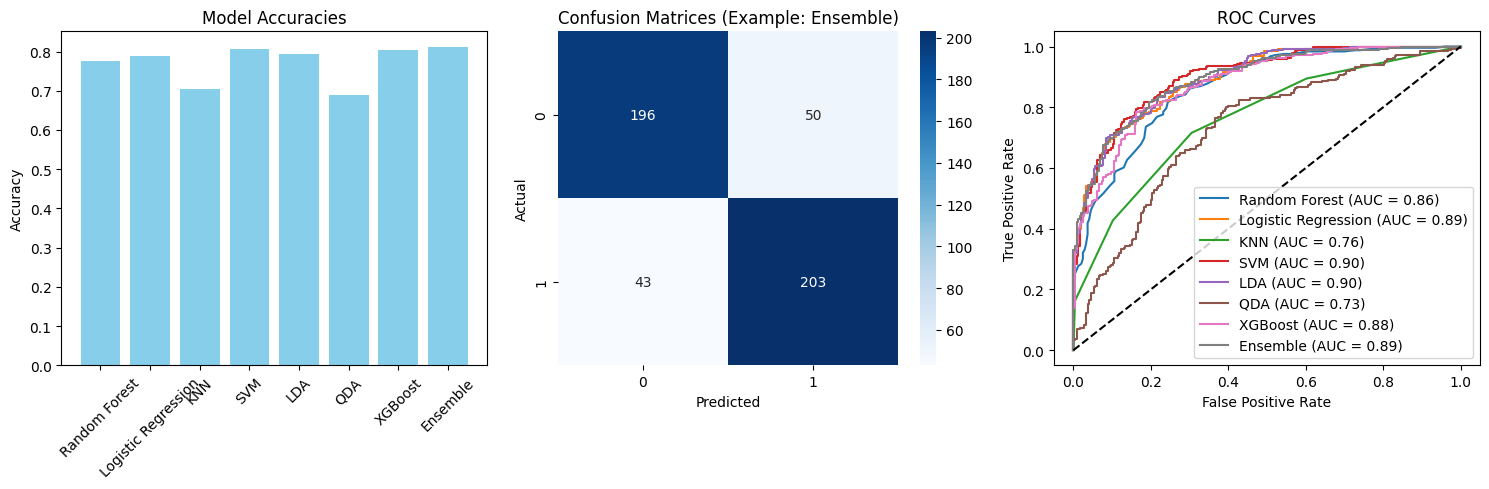

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Store results
accuracies = {}
confusion_matrices = {}
roc_data = {}

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # ROC Data
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        roc_data[name] = (fpr, tpr, roc_auc)

# Evaluate the ensemble
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_ensemble_proba = ensemble_model.predict_proba(X_test)[:, 1]
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
accuracies['Ensemble'] = ensemble_acc

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
confusion_matrices['Ensemble'] = cm_ensemble
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_ensemble_proba)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
roc_data['Ensemble'] = (fpr_ensemble, tpr_ensemble, roc_auc_ensemble)

# Plotting
plt.figure(figsize=(15, 5))

# Accuracy Bar Plot
plt.subplot(1, 3, 1)
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)

# Confusion Matrices
plt.subplot(1, 3, 2)
plt.title('Confusion Matrices (Example: Ensemble)')
sns.heatmap(confusion_matrices['Ensemble'], annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# ROC Curves
plt.subplot(1, 3, 3)
plt.title('ROC Curves')
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()


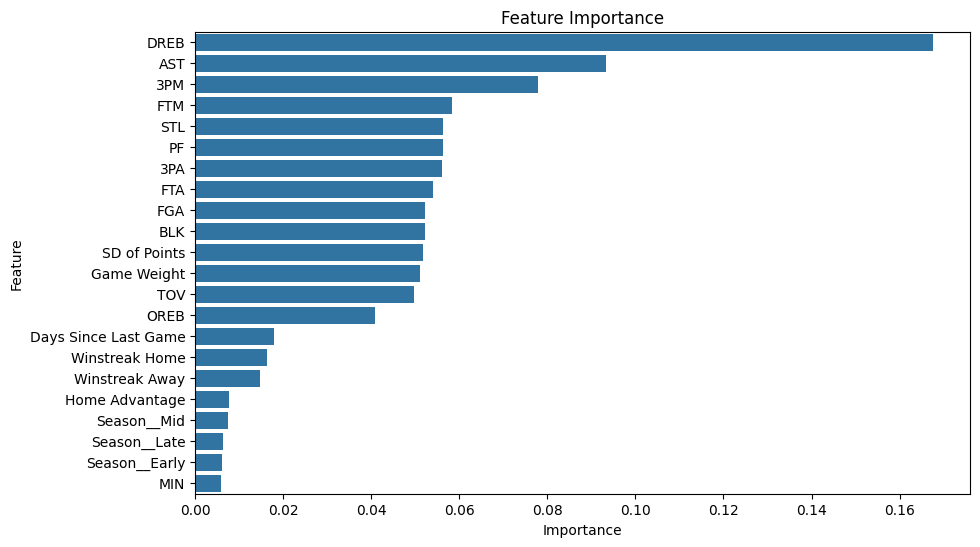

In [ ]:
#graphs feature importance

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are defined from the previous code
model = RandomForestClassifier(random_state=42)  # Initialize a RandomForestClassifier
model.fit(X_train, y_train) # Train the model

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)


# Barplot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

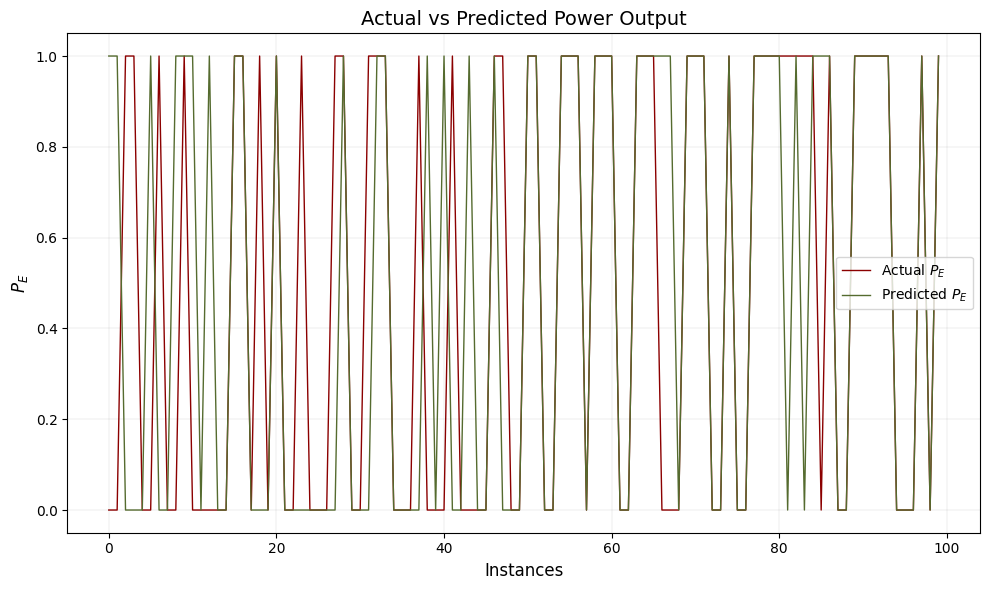

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting with thinner lines and specific colors
plt.plot(y_test.values[:100], color='#8B0000', label=r'Actual $P_E$', linewidth=1)  # Dark red
plt.plot(y_pred[:100], color='#556B2F', label=r'Predicted $P_E$', linewidth=1)  # Olive green

# Titles and labels
plt.title('Actual vs Predicted Power Output', fontsize=14)
plt.xlabel('Instances', fontsize=12)
plt.ylabel(r'$P_E$', fontsize=12)
plt.legend()

# Grid style similar to the reference plot
plt.grid(True, which='both', linestyle='-', linewidth=0.2, color='gray', alpha=0.5)
plt.tight_layout()

plt.show()


# Notes



Depending on the models we use, some may  perform better if you normalize the data. (Like KNN and SVC)

For different models, you need to use one-hot-encoding to handle the season segment feature. Models like random forest can handle it as is (as text) but others like logistic regression need it to be numeric.

## Feature Engineering:

### Features I added:
* Game ID
* Home Advantage
* Turned W/L into binary (1 for Win, 0 for Lose)
* Info about the number of games (1230), number of teams(30), number of games per team (82).
> This data is a full season's worth of data, so we are able to add data for early, mid, or late stage. This is shown in a new column, assigning each game to the first, second, or final third of the season respectively.
* Number of days since last game
* Unique Game ID (so we can group a game's two rows before splitting)
* Found data leakage (+/-) which resulted in 100% model accuracy, so it must be removed/dropped for all models.
* Also found issue with the Win Streak column I made so I removed that.

Even though I added these features, it doesn’t mean we need to use them. If feature selection shows they are not necessary, then we can definitely remove them. But it’s worth exploring them.

### Dummy Variables (turning string into numeric)
* Some models require purely numeric inputs, so I created a copy of the dataset (where we have the season segment) but turned season segment into 3 binary features (if a game was in the early season, the features would be 1, 0, 0 respectively).

### Split the data:
To account for information leakage, we had to split the data keeping in mind that each game is recorded in two rows. If we randomly split the data without this in mind, information leakage will occur, where one row of a game's statistics will be used for the training, and the other row will be used for resting. This will artificially inflate the predictive accuracy of our model. This maintains independence of the training and testing data, ensuring more reliable performance metrics and prevent accidental overfitting via information leakage.

### Features to consider adding:
* Offensive rating (per game) aka offensive efficiency
* Defensive rating (per game) aka defensive efficiency
>Differential between these two

* From three point field goal made and attempts: |3pt field goal attempt - field goal attempts|  is 2 pt field goal attempt
> 3 pointer is worth 50% more than a two pointer so there is a different incentive based on the strategy of the 	team.

* Average number of fouls for each team across the season

* Calculate the difference between the current game and the average game statistics for that team. Could be points in game compared to average points for that team (whether they under/overperformed against themselves historically)





# Next steps:



Feature Selection
> After we create any extra features, we should do variable selection of some kind.

> Plot Feature importance, potentially do feature selection. Some features may be highly correlated, so we can select the most important ones within each set of collinearity if we want to use less features .

 Model and Evaluation:

 Do an ensemble method of a variety of weak and strong classifiers.
> Ensemble method using a mix of weak and strong classifiers (Logistic Regression, K-Nearest Neighbors (KNN), Random Forest (RF), Neural Network, SVC, ....

 Confusion Matrix
> Use a confusion matrix to show our models True Positives, True Negatives, etc.

 Cross Validation

> Use to select things like best RF model

Traditionally, the NBA has an upset rate of between 28-32%, meaning that the "better" team wins 68-72% of the time. Because of this, it is very challenging to create a model with an accuracy higher than this range. Given the limitations of the data I am using, I hope to achieve an accuracy that approaches the 68% threshold (https://github.com/luke-lite/NBA-Prediction-Modeling?tab=readme-ov-file#data-overview)


Limitations that will be in our model: Our models are unable to quickly account for roster changes, which are mainly due to a few factors: injuries, trades, free-agency, draft. Because of this, we should check our accuracy of the model per quarter. Models will have less error in the second half of each season because of fewer roster changes. At the start of a season, however, there will be a lot of uncertainty since the off-season is when we see the vast majority of roster changes.






Resources:

https://medium.com/@juliuscecilia33/predicting-nba-game-results-using-machine-learning-and-python-6be209d6d165

https://github.com/luke-lite/NBA-Prediction-Modeling?tab=readme-ov-file#data-overview

Lots of other projects for NBA prediction posted online we can use for ideas, making sure we are headed in the right direction, doing things correctly.

In [ ]:
df.head(60)

,Game ID,Team,Match Up,Home Advantage,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Days Since Last Game,SD of Points,Past Wins,Game Weight,Season Segment,Winstreak Home,Winstreak Away
0,1,GSW,GSW vs. PHX,1,2023-10-24,0,240,104,36,101,35.6,10,43,23.3,22,28,78.6,18,31,49,19,11,6,11,23,-4,0.0,11.722405,0,1,Early,0,0
1,1,PHX,PHX @ GSW,0,2023-10-24,1,240,108,42,95,44.2,11,33,33.3,13,17,76.5,17,43,60,23,5,7,19,22,4,0.0,10.575491,1,1,Early,0,0
2,2,LAL,LAL @ DEN,0,2023-10-24,0,240,107,41,90,45.6,10,29,34.5,15,20,75,13,31,44,23,5,4,12,18,-12,0.0,12.441910,0,1,Early,0,0
3,2,DEN,DEN vs. LAL,1,2023-10-24,1,240,119,48,91,52.7,14,34,41.2,9,12,75,9,33,42,29,9,6,12,15,12,0.0,12.357955,1,1,Early,0,0
4,3,MEM,MEM vs. NOP,1,2023-10-25,0,240,104,38,91,41.8,12,43,27.9,16,20,80,8,29,37,23,8,7,13,19,-7,0.0,9.867177,0,1,Early,0,0
5,3,IND,IND vs. WAS,1,2023-10-25,1,240,143,56,107,52.3,20,43,46.5,11,12,91.7,10,41,51,38,10,8,12,23,23,0.0,13.602367,1,1,Early,0,0
6,4,WAS,WAS @ IND,0,2023-10-25,0,240,120,44,96,45.8,9,24,37.5,23,29,79.3,11,34,45,28,6,9,14,11,-23,0.0,10.532502,0,1,Early,0,0
7,4,CHA,CHA vs. ATL,1,2023-10-25,1,240,116,43,86,50.0,11,37,29.7,19,26,73.1,12,39,51,34,5,3,19,21,6,0.0,12.123797,1,1,Early,0,0
8,5,NYK,NYK vs. BOS,1,2023-10-25,0,240,104,36,97,37.1,18,41,43.9,14,26,53.8,17,30,47,24,9,0,11,22,-4,0.0,12.219937,0,1,Early,0,0
9,5,MIA,MIA vs. DET,1,2023-10-25,1,240,103,37,92,40.2,8,22,36.4,21,26,80.8,16,32,48,22,11,3,7,18,1,0.0,11.476355,1,1,Early,0,0
